# Correcting probabilities

We updated the experiment in https://qiskit.org/ecosystem/mthree/tutorials/02_correcting_probs.html designed to correct readout errors and transform the outcomes to a true probability distribution. The experiment runs in the 14 qubit noisy simulator FakeMelbourne and shows the circuit and probability distributions for the raw device, M3 and image intensity mitigation at an input range of 3% (0.03, 0.97) 


In [1]:
# https://qiskit.org/ecosystem/mthree/tutorials/02_correcting_probs.html
import numpy as np
from qiskit import *
from qiskit.providers.fake_provider import FakeMelbourne
from qiskit.visualization import plot_histogram
import mthree
from time import time

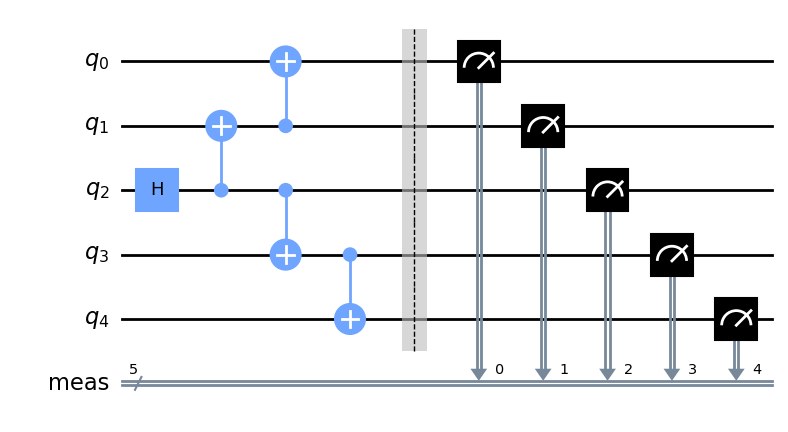

In [2]:
# Setup experiment
backend = FakeMelbourne()

qc = QuantumCircuit(5)
qc.h(2)
qc.cx(2,1)
qc.cx(1,0)
qc.cx(2,3)
qc.cx(3,4)
qc.measure_all()
qc.draw('mpl')

In [3]:
# Run experiment
shots=2048
trans_qc = transpile(qc, backend)
raw_counts = backend.run(trans_qc, shots=shots).result().get_counts()

# M3 mitigation
mit = mthree.M3Mitigation(backend)

start       = time()
mit.cals_from_system(range(qc.num_qubits))
end        = time()
print(f'M3 calibration time (ms): {(end - start)*1000:.2f}')

start       = time()
quasi = mit.apply_correction(raw_counts, range(qc.num_qubits))
end        = time()
print(f'M3 correction time (ms): {(end - start)*1000:.2f}')

probs = quasi.nearest_probability_distribution()

M3 calibration time (ms): 452.00
M3 correction time (ms): 10.00


In [4]:
# Filter mitgation
import mitigation as mitigation

start       = time()
in_range = (0.03, 0.97) # 'image' 
probs1 = mitigation.get_probabilities(raw_counts, shots, in_range=in_range)
end        = time()

print(f'Filter mitigation at 3% execution time (ms): {(end - start)*1000:.2f}')

Filter mitigation at 3% execution time (ms): 0.00


Our technique clearly outperforms M3 by a wide margin. These are solid and encouraging results and the first step in a battery of tests to demonstrate the feasibility of this technique. 

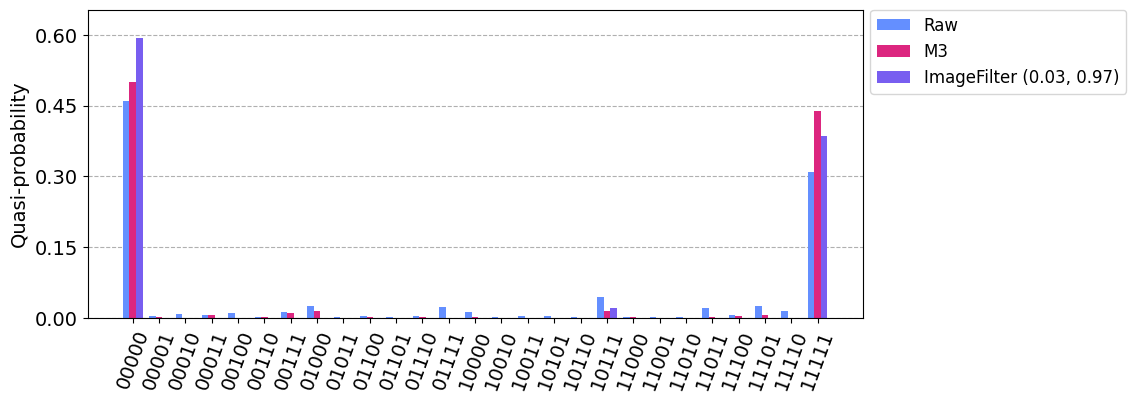

In [5]:
# Plot
plot_histogram([raw_counts, probs, probs1], figsize=(10,4), legend=['Raw', 'M3', 'ImageFilter ' + str(in_range)], bar_labels=False)
#plot_histogram([probs, probs1], figsize=(10,4), legend=['M3', 'Image Filter ' + str(in_range)])